In [1]:
#!pip install opencv-python

In [9]:
print('test')

test


In [10]:
import cv2#cv2라이브러리를 이용해서 이미지 읽어옴
import numpy as np
import os
from matplotlib import pyplot as plt
print(os.getcwd())
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\hi\Anaconda3\jupiter\day21딥러닝


In [11]:
data_dir = os.chdir(os.getcwd() + "./개고양이데이터/img-animal/")

In [12]:
print(os.getcwd())

C:\Users\hi\Anaconda3\jupiter\day21딥러닝\개고양이데이터\img-animal


In [13]:
#이미지 파일 리스트 4000개를 일겅봐서, 각각의 이미지파일마다 타켓설정

In [14]:
import glob
from glob import glob

In [15]:
data_list = glob('*.jpg')
print('파일의 목록 개수 >> ', len(data_list))
print('파일의 목록 타입 >> ', type(data_list))

파일의 목록 개수 >>  4000
파일의 목록 타입 >>  <class 'list'>


In [16]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [17]:
#string을 특정한 기준에 의해 token으로 끊어 리스트를 리턴
token = text_to_word_sequence(data_list[0])
token, type(token)

(['cat', '0', 'jpg'], list)

In [18]:
label = []

In [19]:
for x in data_list[:100]:
    token = text_to_word_sequence(x)
    label.append(token[0])
len(label)


100

In [20]:
label2 = []

In [21]:
for x in data_list[:4001]:
    token = text_to_word_sequence(x)
    label2.append(token[0])
len(label2)

4000

In [22]:
# 라벨 인코딩(카테고리형 문자를 숫자로 자동 변환해주는 역할)
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()
encoder = LabelEncoder()
label3 = encoder.fit_transform(label2)
label3[:5]

array([0, 0, 0, 0, 0], dtype=int64)

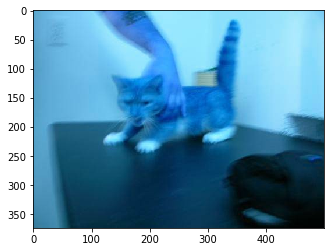

In [24]:
img0 = cv2.imread(data_list[0])
plt.imshow(img0)

In [25]:
img0.shape

(374, 500, 3)

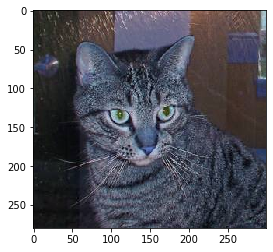

In [26]:
img1 = cv2.imread(data_list[1])
plt.imshow(img1)

In [27]:
img1.shape

(280, 300, 3)

In [28]:
##표준화(0~1사이로)
image1 = img1/255
image1[0][0]

array([0.15686275, 0.17254902, 0.15294118])

In [22]:
#크기를 동일하게 맞추어 변경해주자!

In [23]:
data_height = 150
data_width = 150
channel_n = 3#칼라로 맞추기(흑백이면 1)칼라는 rgb3개를 고려해야하기 때문에 3이다.

In [24]:
image2 = cv2.resize(image1, (data_height, data_width))
image2.shape

(150, 150, 3)

In [25]:
##255로 표준화 한 후
## 4000개의 크기를 다 변경해주세요
img_list = []#크기를 변경하고 나서의 결과를 모아주기 위한 리스트
for x in data_list:
    #픽셀크기가(0~255)이므로 255로 나누자
    scaled_one = cv2.imread(x) / 255
    resized_one = cv2.resize(scaled_one, (data_height, data_width))
#     print('변경 전', scaled_one.shape)
#     print('변경 후', resized_one.shape)    
    img_list.append(resized_one)
len(img_list),img_list[0].shape

(4000, (150, 150, 3))

In [26]:
img_list[0]
#[3.41830065e-01, 6.43790850e-01, 7.96732026e-01] 1차원
#[[3.41830065e-01, 6.43790850e-01, 7.96732026e-01],
#         [3.60784314e-01, 6.62745098e-01, 8.15686275e-01]] 2차원

array([[[3.41830065e-01, 6.43790850e-01, 7.96732026e-01],
        [3.60784314e-01, 6.62745098e-01, 8.15686275e-01],
        [3.65359477e-01, 6.67320261e-01, 8.20261438e-01],
        ...,
        [4.84313725e-01, 8.07843137e-01, 9.67973856e-01],
        [4.70588235e-01, 7.96078431e-01, 9.58823529e-01],
        [4.78091503e-01, 7.87895425e-01, 9.40836601e-01]],

       [[3.41830065e-01, 6.43790850e-01, 7.96732026e-01],
        [3.60784314e-01, 6.62745098e-01, 8.15686275e-01],
        [3.65359477e-01, 6.67320261e-01, 8.20261438e-01],
        ...,
        [4.88627451e-01, 8.12052288e-01, 9.62562092e-01],
        [4.75450980e-01, 8.01490196e-01, 9.60784314e-01],
        [4.80026144e-01, 7.89830065e-01, 9.42771242e-01]],

       [[3.41830065e-01, 6.43790850e-01, 7.96732026e-01],
        [3.60784314e-01, 6.62745098e-01, 8.15686275e-01],
        [3.65359477e-01, 6.67320261e-01, 8.20261438e-01],
        ...,
        [5.00261438e-01, 8.17908497e-01, 9.64531590e-01],
        [4.89150327e-01, 8.06

# CNN특성 추출을 하려면 이미지가 4차원이 되어야한다.
## (4000, 150, 150, 3)
## 4000: 이미지 개수
## 150, 150: 가로세로 픽셀
## 3: 칼라
## 0으로 채워지는 4차원 배열을 하나 만들어두었다가
## 이미지 하나하나를 스케일링하고 리사이징해서
## 4차원에 하나씩 넣자!


In [27]:
total_images = np.zeros((5, data_height, data_width, channel_n))
total_images[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [28]:
##data_list : 전체 이미지 목록의 리스트
##읽어온 이미지 목록을 넣으면 라벨링/이미지 스케일링/리사이징해서
##우리가 원하는 이미지 데이터를 만들자.
def make_file(data_height, data_width, channel_n, data_list_n):#len(data_list)=data_list_n
    ## 라벨링한 결과 넣어줄 리스트 필요
    label = []
    ## 4차원으로 만들어줄 4차원 리스트 필요
    images = np.zeros((data_list_n, data_height, data_width, channel_n))
    ## 이미지 리스트에서 하나씩 꺼내서 라벨링, 스케일링, 리사이징하자
    for i, image in enumerate(data_list):#i가 1씩증가,data_list에 이미지 목록 다 들어있음
        
        ## 라벨링:dog.01.jpg
        tokens = text_to_word_sequence(image)#이미지를 토큰으로 끊어주자(dog.01.jpg이런식으로)
        label.append(tokens[0])#0번째 토큰(dog또는 cat)을 뽑아서 append하자
        
        ## 읽어서, 스케일링, 리사이징해서
        image2 = cv2.imread(image)
        image3 = cv2.resize(image2,(data_height, data_width)) / 255
        
        ## 4차원 리스트에 하나씩 끼자
        images[i, :, :, :] = image3
    label2 = np.array(label)
    return label2, images

In [29]:
labels, images = make_file(data_height, data_width, channel_n, 4000)#4000개의 이미지

In [30]:
#labels에 고양인지 개인지에 대한 토큰만 담김
labels

array(['cat', 'cat', 'cat', ..., 'dog', 'dog', 'dog'], dtype='<U3')

In [31]:
#4000개 1차원의 shape을 가짐['cat', 'cat', 'cat', ..., 'dog', 'dog', 'dog']
labels.shape

(4000,)

In [32]:
items = label2
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label, len(label) 

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64), 4000)

In [33]:
encoder.classes_

array(['cat', 'dog'], dtype='<U3')

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
## train, test데이터를 나누어보자.

In [36]:
x = images
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size= 0.2,
                                                    random_state=55
                                                   )
print(X_train.shape, X_test.shape)

(3200, 150, 150, 3) (800, 150, 150, 3)


In [29]:
## 딥러닝 모델을 만들자!!!!!!!
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [30]:
model = models.Sequential()

In [31]:
model = models.Sequential()
model = Sequential()
### 특성추출 레이어를 쌓아준다.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, channel_n)))
model.add(MaxPool2D((2, 2)))#최대값으로 요약
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))#최대값으로 요약

### 딥러닝 학습 레이어를 쌓아준다.
### 입력--히든--출력 순서대로 쌓아준다.
### 입력(1개)-- 1차원이여야함.
model.add(Flatten()) ## 이미지 데이터를 1차원으로 만들어주는 객체 

### 히든
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌
model.add(Dense(5, activation='relu'))
model.add(Dropout(rate=0.5))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌

### 출력(1개)-- 딥러닝하는 학습의 종류에 따라 다르게 써주어야 함.!!
### 이진 분류인 경우(1, sigmoid)
### 다중 분류인 경우(n, softmax)
### 회귀인 경우(1, linear)
model.add(Dense(1, activation='sigmoid'))

model.summary()

NameError: name 'data_height' is not defined

In [45]:
## 모델의 설정값 지정
## 1. 기울기 찾는데 최적의 방법 설정(optimizer)
## 2. 특정한 가중치를 가지는 경우 오차를 계산하는 방법 설정(loss)
##    회귀인 경우: mae
##    분류인 경우: 이진=> binary_crossentropy,
##    다중분류인 경우=> sparse_categorical_crossentropy
## 3. fit시킬 때 fit시키는 상황이 순서대로 프린트되는데 출력되는 항목 설정(metrics)
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [46]:
## 공부시키자
# epoch마다 train의 loss,acc 뿐만아니라 test의 loss,acc도 알고싶어
# fit함수안에 validation_data=(X_test, y_test)를 넣어 돌려보자.
# 조기종료(earlyStopping) : 
# epoch를 실행할 때 최적의 acc인 경우, 더이상 epoch를 수행하지 않아도 되도록 설정
# 모델저장(checkPoint):
# 최적의 acc인 경우의 가중치를 자동으로 모델파일로 저장하게 설정
# 특정한 상황을 기다렸다가 특정한 처리를 하고자 하는 경우(콜백함수)
# 1)객체를 만들어주고, fit(callbacks = [객체])
es = EarlyStopping(patience=3, restore_best_weights=True)
cp = ModelCheckpoint('best_cnn_1.h5')
cnn_history = model.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[es, cp],
    verbose=2
)

Epoch 1/10
32/32 - 33s - loss: 0.7567 - accuracy: 0.4978 - val_loss: 0.6927 - val_accuracy: 0.4963 - 33s/epoch - 1s/step
Epoch 2/10
32/32 - 31s - loss: 0.6936 - accuracy: 0.5056 - val_loss: 0.6932 - val_accuracy: 0.4963 - 31s/epoch - 974ms/step
Epoch 3/10
32/32 - 38s - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.4963 - 38s/epoch - 1s/step
Epoch 4/10
32/32 - 31s - loss: 0.6932 - accuracy: 0.4891 - val_loss: 0.6932 - val_accuracy: 0.4963 - 31s/epoch - 970ms/step


In [47]:
test_result = model.evaluate(X_test,y_test)
test_result

25/25 [==============================] - 2s 82ms/step - loss: 0.6927 - accuracy: 0.4963


[0.6927344799041748, 0.4962500035762787]

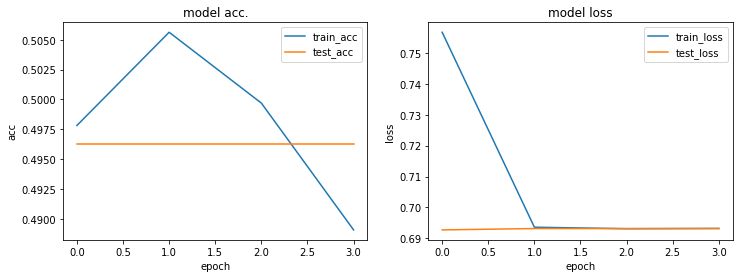

In [48]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) ## 1행2열의 도표, 1열
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model acc.')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc','test_acc'])

plt.subplot(1, 2, 2) ## 1행2열의 도표, 2열
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','test_loss'])